In [7]:
using LinearAlgebra
using CairoMakie
using CurveFit
using CSV
using DataFrames

In [8]:
df = CSV.read("../../julia_parts_benchmark.csv", DataFrame)

Row,M,total_time,psi_time,zeta_time,helmholtz_time,poisson_times
,Int64,Float64,Float64,Float64,Float64,Float64
1,8,7.64867e-5,7.7825e-6,6.82416e-6,2.7958e-5,2.7e-5
2,16,0.000330663,2.59217e-5,2.13017e-5,0.000113833,0.000113333
3,32,0.00162941,0.000124658,5.81433e-5,0.000660291,0.0006515
4,64,0.00667449,0.000566295,0.000164368,0.00275021,0.00273592
5,128,0.0283887,0.00222587,0.000669,0.0119447,0.0118951


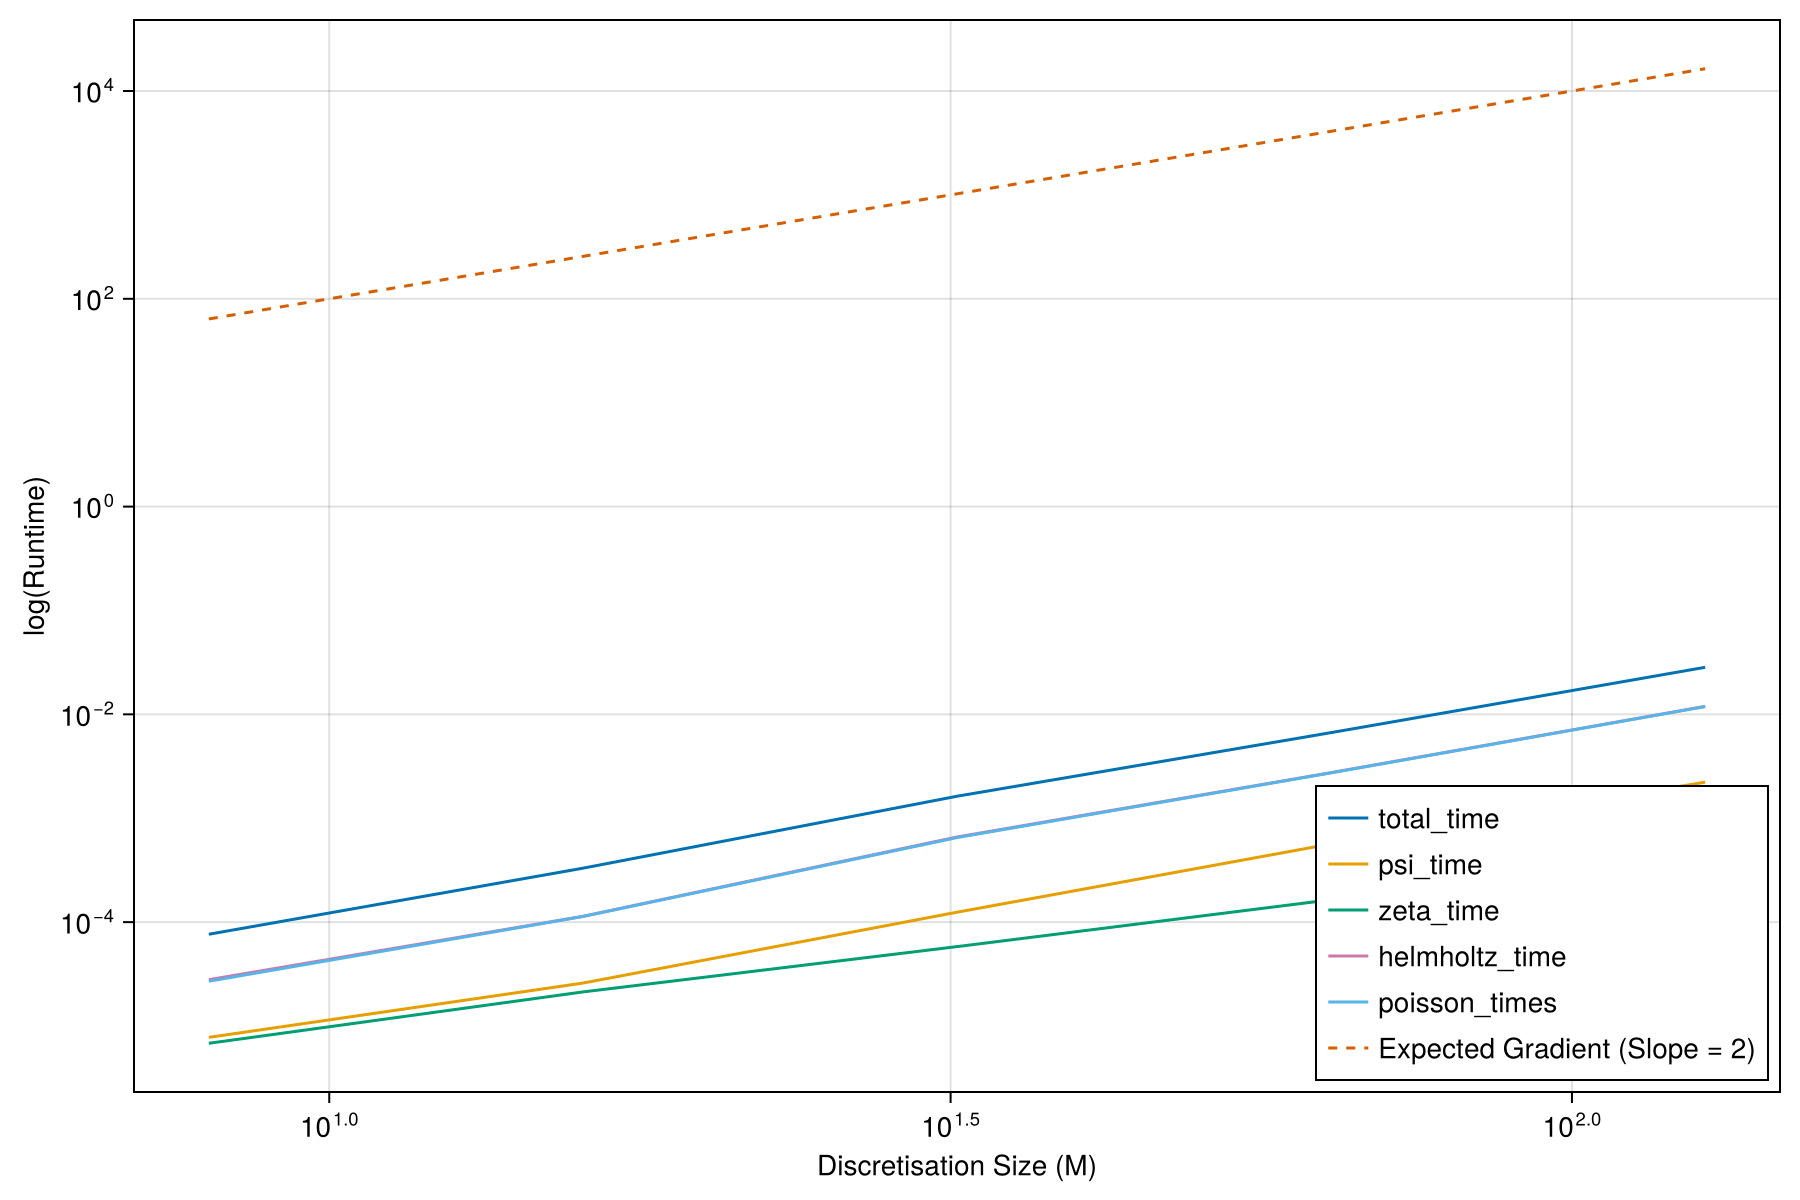

CairoMakie.Screen{IMAGE}


In [20]:


# Calculate the slope of log-log values to check for second order convergence.
# fit = linear_fit(log.(M_list), log.(errors))
# slope = round(fit[2]; digits=4)

fig = Figure(size = (900, 600), figure_padding = 10)
ax = Axis(fig[1, 1], xscale=log10, yscale=log10, xlabel="Discretisation Size (M)", ylabel="log(Runtime)")

x_values = df[:, 1]

expected_curve(x) = x^2
ideal_curve = expected_curve.(x_values)

for col in names(df)[2:end]  # Skip the first column (used as x-axis)
    lines!(ax, x_values, df[:, col], label=col)
end


# lines!(ax, M_list, errors, label="Global Error (Slope = $slope)")
lines!(ax, x_values, ideal_curve, linestyle=:dash, label="Expected Gradient (Slope = 2)")

axislegend(position = :rb)

display(fig)

# save(plot_name, fig)